In [1]:
from manim import *

Manim Community v0.16.0

In [2]:
config.media_width = "100%"
config.media_embed = True

In [3]:
def interpolate_color_range(*colors):
    alpha = colors[-1]
    colors = colors[:-1]
    partition = len(colors)
    dx = 1 / (partition-1)
    colors_steps = [
        (colors[i],colors[i+1])
        for i in range(partition-1)
    ]
    alpha_steps = [
        (dx * i, dx * (i+1))
        for i in range(partition-1)
    ]
    i_count = 0
    for c_s,a_s in zip(colors_steps,alpha_steps):
        if a_s[0] <= alpha <= a_s[1]:
            d_alpha = alpha - dx * i_count
            c_alpha = d_alpha / dx
            return interpolate_color(c_s[0], c_s[1], c_alpha)
        i_count += 1


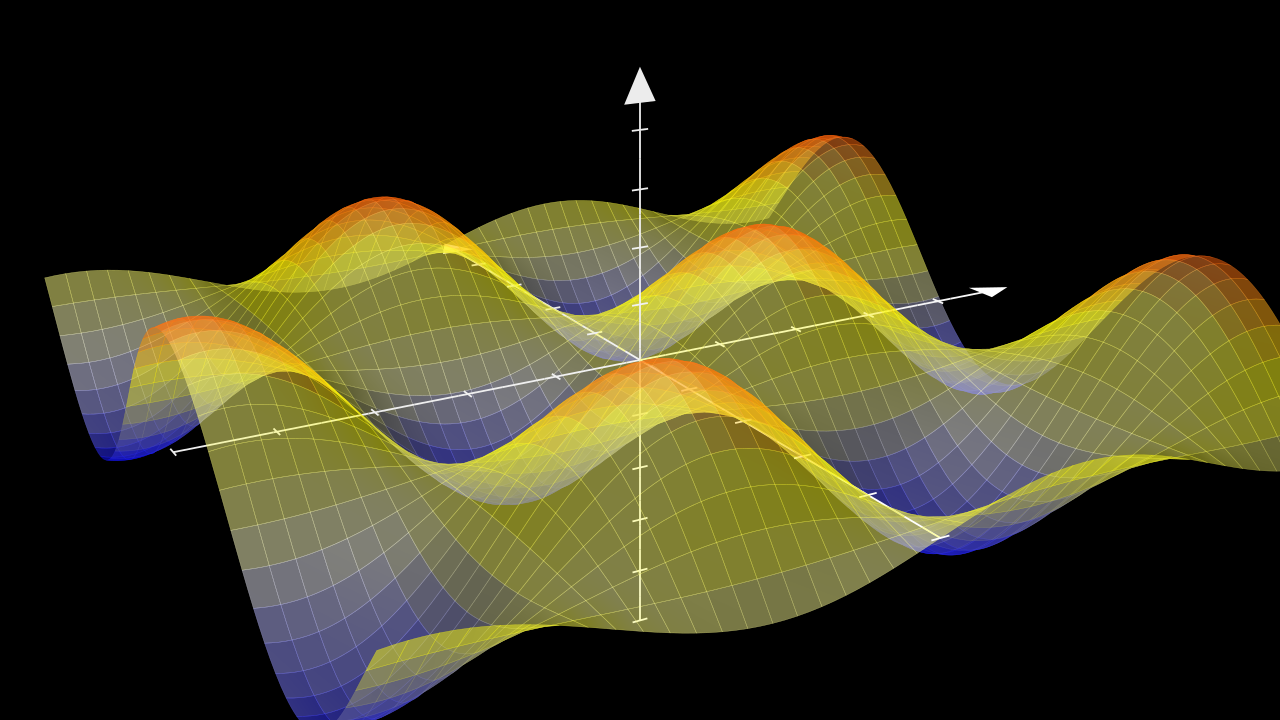

In [5]:
%%manim -qm -v WARNING E1

class E1(ThreeDScene):
    def construct(self):
        self.set_camera_orientation(phi=70*DEGREES,theta=-120*DEGREES)

        axes = ThreeDAxes(x_range=(-5, 5, 1), y_range=(-5, 5, 1), z_range=(-5, 5, 1))
        surface = Surface(
            lambda u, v: axes.c2p(u, v, 2 * np.sin(u) * np.cos(v)),
            resolution=(42, 42),
            v_range=[-5, 5],
            u_range=[-5, 5],
        )
        surface.fade(0.5)
        max_range = max(*[axes.c2p(*sq.get_center())[2] for sq in surface])

        for sq in surface:
            center = axes.c2p(*sq.get_center())[2]
            center_prop = (center + max_range)/2
            color = interpolate_color_range(PURE_BLUE,YELLOW,PURE_RED,center_prop)
            sq.set_color(color)


        self.add(axes,surface)

In [8]:
%%manim -qm -v WARNING E2

class E2(ThreeDScene):
    def construct(self):
        self.set_camera_orientation(phi=70*DEGREES,theta=-120*DEGREES)

        axes = ThreeDAxes(x_range=(-5, 5, 1), y_range=(-5, 5, 1), z_range=(-5, 5, 1))
        plane_surface = Surface(
            lambda u, v: axes.c2p(u, v, 0),
                resolution=(42, 42),
                v_range=[-5, 5],
                u_range=[-5, 5],
        )
        surface = Surface(
        lambda u, v: axes.c2p(u, v, 2 * np.sin(u) * np.cos(v)),
            resolution=(42, 42),
            v_range=[-5, 5],
            u_range=[-5, 5],
        )
        surface.fade(0.5)
        max_range = max(*[axes.c2p(*sq.get_center())[2] for sq in surface])

        for sq in [*surface,*plane_surface]:
            center = axes.c2p(*sq.get_center())[2]
            center_prop = (center + max_range)/2
            color = interpolate_color_range(PURE_BLUE,YELLOW,PURE_RED,center_prop)
            sq.set_color(color)


        self.add(axes)
        self.play(Write(plane_surface))
        self.wait()
        self.play(ReplacementTransform(plane_surface,surface))
        self.wait()

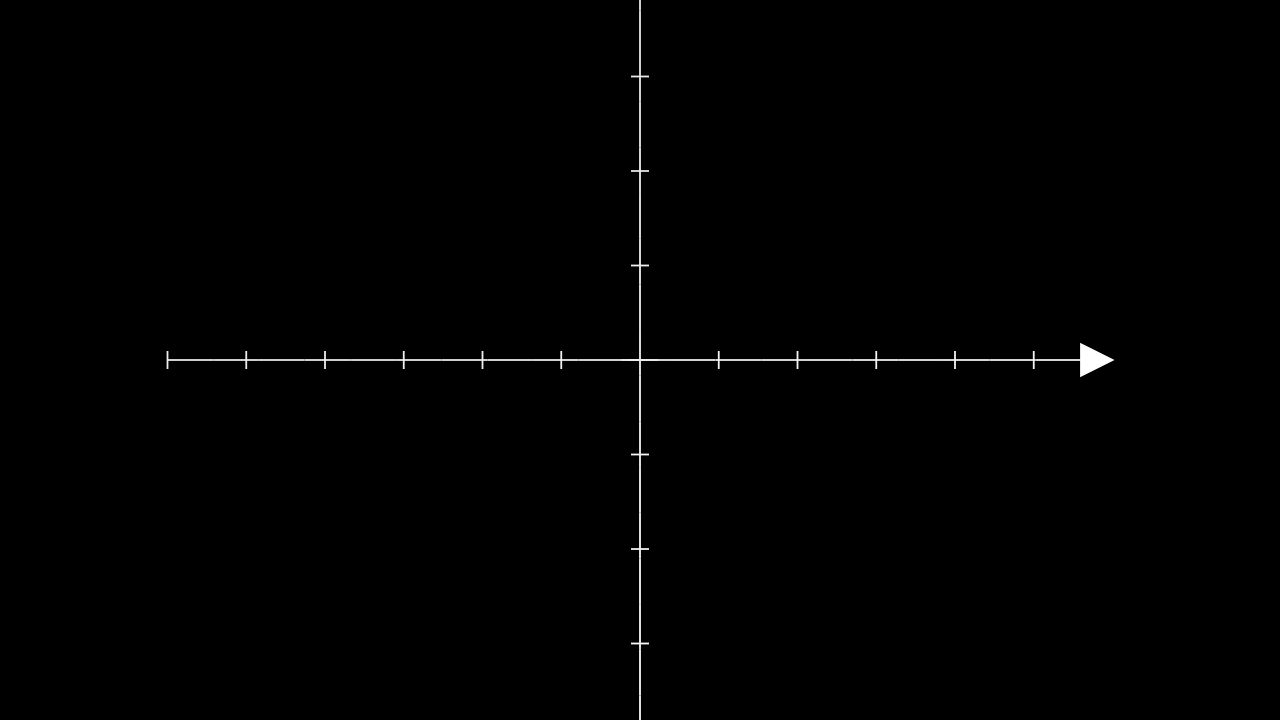

In [9]:
%%manim -qm -v WARNING E3

class E3(ThreeDScene):
    def construct(self):
        axes_3d = ThreeDAxes() # <- Axes in 3D
        self.add(axes_3d)

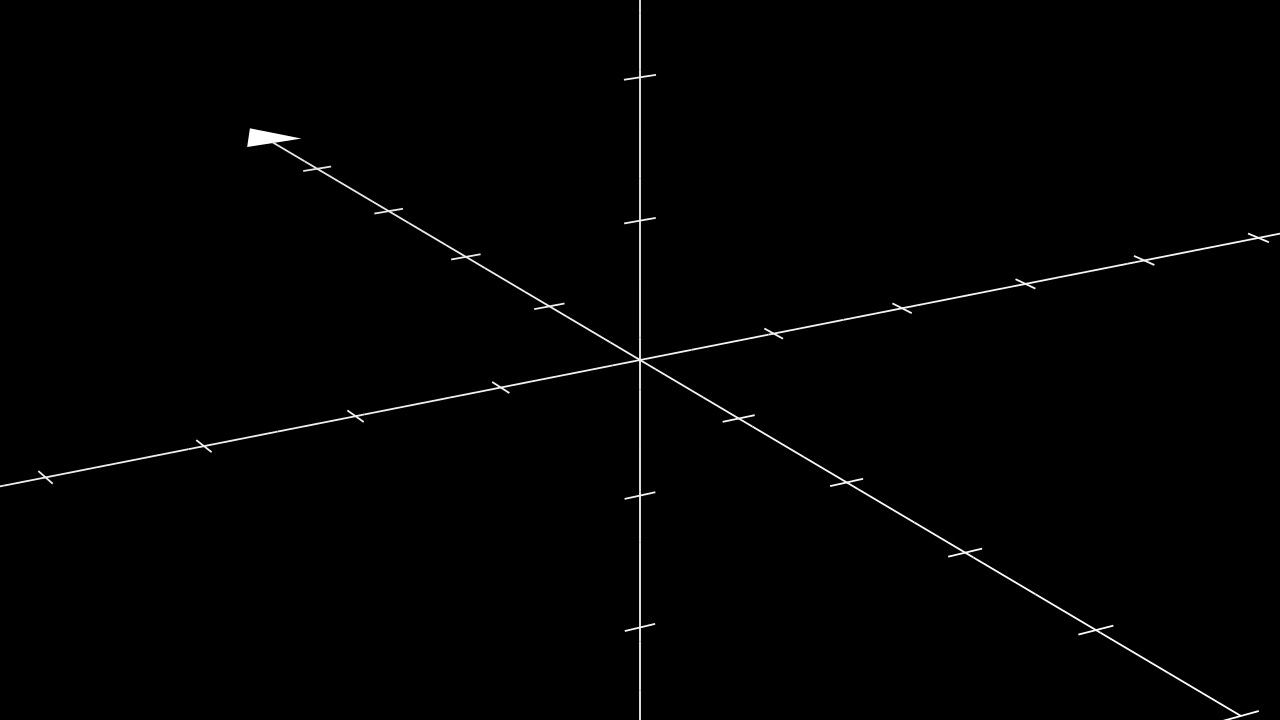

In [10]:
%%manim -qm -v WARNING E4

class E4(ThreeDScene):
    def construct(self):
        axes_3d = ThreeDAxes()
        self.set_camera_orientation(phi=70*DEGREES,theta=-120*DEGREES,zoom=2)

        self.add(axes_3d)

In [11]:
%%manim -qm -v WARNING E5

class E5(ThreeDScene):
    def construct(self):
        axes_3d = ThreeDAxes()
        self.add(axes_3d)
        self.move_camera(phi=70*DEGREES,run_time=3)
        self.wait()
        self.move_camera(theta=-120*DEGREES,rate_func=there_and_back,run_time=3)
        self.wait()
        self.move_camera(zoom=2,run_time=3)
        self.wait()

In [12]:
%%manim -qm -v WARNING E6

class E6(ThreeDScene):
    def construct(self):
        axes_3d = ThreeDAxes()
        text = Text("Hello world")
        self.add(axes_3d)
        self.move_camera(
            phi=70*DEGREES,
            theta=-120*DEGREES,
            added_anims=[Write(text)],
            run_time=5)
        self.wait()

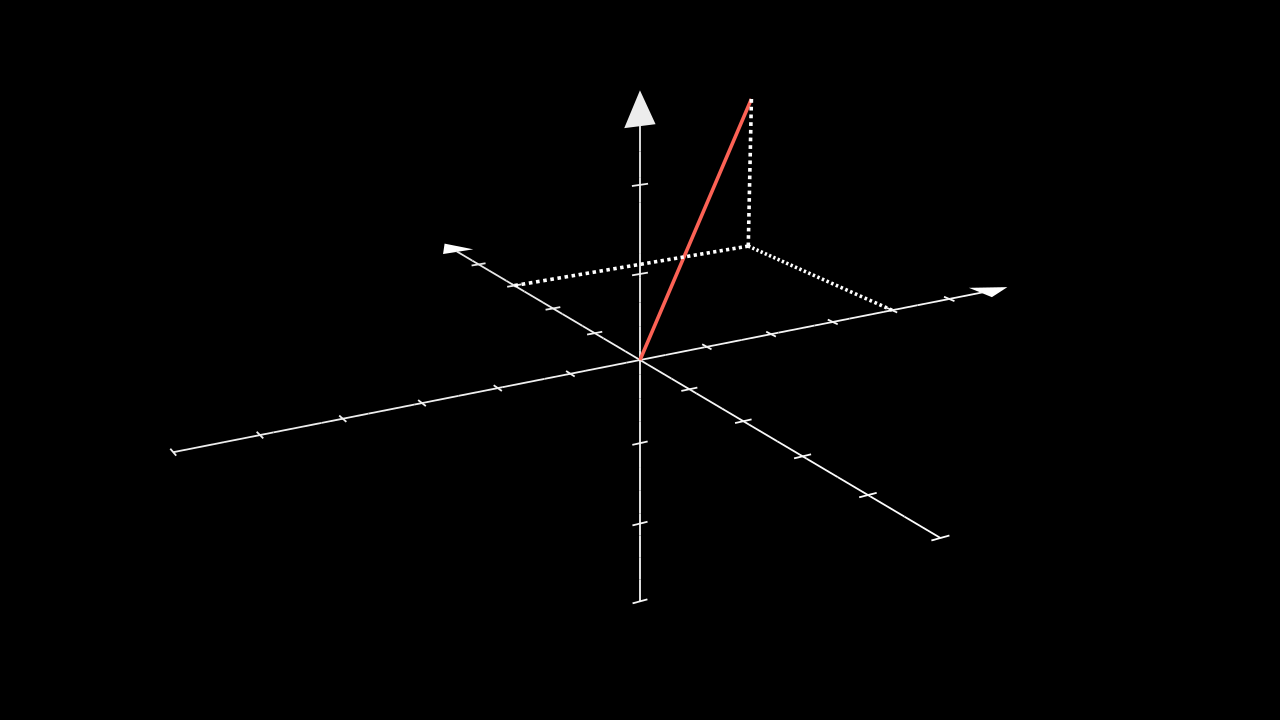

In [13]:
%%manim -qm -v WARNING E7

class E7(ThreeDScene):
    def construct(self):
        axes_3d = ThreeDAxes(
            # unit_size=1 in Z axis to plot Surfaces
            z_range=(-3,3,1),
            z_length=6,
        )
        self.set_camera_orientation(phi=70*DEGREES,theta=240*DEGREES)

        main_line        = Line(ORIGIN,axes_3d.c2p(4,3)+2*OUT,color=RED)
        vertical_line    = DashedLine(axes_3d.c2p(4,0),axes_3d.c2p(4,3))
        horizontal_line  = DashedLine(axes_3d.c2p(0,3),axes_3d.c2p(4,3))
        fall_line        = DashedLine(axes_3d.c2p(4,3),axes_3d.c2p(4,3)+OUT*2)
        self.add(
            axes_3d,
            main_line, vertical_line, horizontal_line, fall_line
        )

In [14]:
%%manim -qm -v WARNING E8

class E8(ThreeDScene):
    def construct(self):
        axes_3d = ThreeDAxes()
        func = axes_3d.plot_parametric_curve(
            lambda t: np.array([
                2*np.cos(t),
                3*np.sin(t),
                t/3
            ]),
            t_range=(-2*PI,2*PI,0.01),
            color=RED
        )

        self.set_camera_orientation(phi=70*DEGREES,theta=240*DEGREES)
        self.add(
            axes_3d,
            func
        )
        self.wait(0.5)
        self.move_camera(theta=120*DEGREES,run_time=6,rate_func=linear)
        self.wait(0.5)
        self.move_camera(theta=90*DEGREES,phi=0,run_time=2,rate_func=smooth)
        self.wait(0.5)

In [15]:
%%manim -qm -v WARNING E9

class E9(ThreeDScene):
    def construct(self):
        axes_3d = ThreeDAxes(
            x_range=(-6,6,1),
            x_length=12,
            y_range=(-5,5,1),
            y_length=10,
            z_range=(-3,3,1),
            z_length=6,
        )
        self.set_camera_orientation(phi=70*DEGREES,theta=240*DEGREES)

        surface = Surface(
            lambda u, v: np.array([
                np.cos(TAU * v),
                np.sin(TAU * v),
                2 * (1 - u)
            ]),
        ).fade(0.5)

        paraboloid = Surface(
            lambda u, v: np.array([
                np.cos(v)*u,
                np.sin(v)*u,
                u**2
            ]),
            v_range=(0,TAU),
        ).fade(0.5)

        para_hyp = Surface(
            lambda u, v: np.array([
                u,
                v,
                u**2-v**2
            ]),
            u_range=(-2,2),
            v_range=(-2,2),
        ).fade(0.5)

        cone = Surface(
            lambda u, v: np.array([
                u*np.cos(v),
                u*np.sin(v),
                u
            ]),
            u_range=(-2,2),
            v_range=(0,TAU),
        )
        sphere = Surface(
            lambda u, v: np.array([
                1.5*np.cos(u)*np.cos(v),
                1.5*np.cos(u)*np.sin(v),
                1.5*np.sin(u)
            ]),
            #Resolution of the surfaces
            u_range=(-PI/2,PI/2),
            v_range=(0,TAU),
        )

        self.add(
            axes_3d,surface
        )
        self.play(
            Transform(surface, paraboloid)
        )
        self.wait(0.5)
        self.play(
            Transform(surface, para_hyp)
        )
        self.wait(0.5)
        self.play(
            Transform(surface, cone)
        )
        self.wait(0.5)
        self.play(
            Transform(surface, sphere)
        )
        self.wait(0.5)

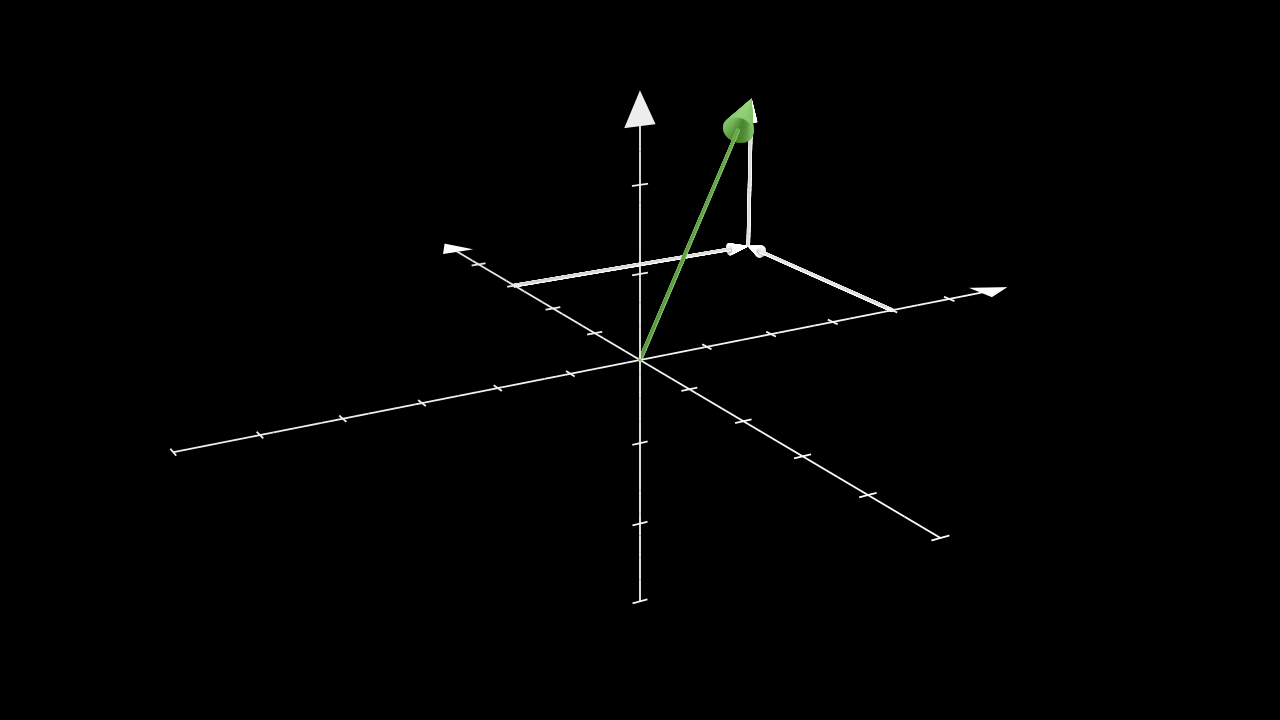

In [16]:
%%manim -qm -v WARNING E10

class E10(ThreeDScene):
    def construct(self):
        axes_3d = ThreeDAxes(
            # unit_size=1 in Z axis
            z_range=(-3,3,1),
            z_length=6,
        )
        self.set_camera_orientation(phi=70*DEGREES,theta=240*DEGREES)
        # Arrows3Ds are surfaces, so the more you add, the longer it will take to render.
        main_line        = Arrow3D(ORIGIN,axes_3d.c2p(4,3)+2*OUT,color=GREEN,height=0.7,base_radius=0.2)
        vertical_line    = Arrow3D(axes_3d.c2p(4,0),axes_3d.c2p(4,3))
        horizontal_line  = Arrow3D(axes_3d.c2p(0,3),axes_3d.c2p(4,3))
        fall_line        = Arrow3D(axes_3d.c2p(4,3),axes_3d.c2p(4,3)+OUT*2)

        self.add(
            axes_3d,
            main_line,
            vertical_line,
            horizontal_line,
            fall_line,
        )

In [17]:
%%manim -qm -v WARNING E11

class E11(ThreeDScene):
    def construct(self):
        axes_3d = ThreeDAxes(
            # unit_size=1 in Z axis
            z_range=(-3,3,1),
            z_length=6,
        )
        self.set_camera_orientation(phi=70*DEGREES,theta=240*DEGREES)
        # Arrows3Ds are surfaces, so the more you add, the longer it will take to render.
        main_line        = Arrow3D(ORIGIN,axes_3d.c2p(4,3)+2*OUT,color=GREEN,height=0.7,base_radius=0.2)
        vertical_line    = Arrow3D(axes_3d.c2p(4,0),axes_3d.c2p(4,3))
        horizontal_line  = Arrow3D(axes_3d.c2p(0,3),axes_3d.c2p(4,3))
        fall_line        = Arrow3D(axes_3d.c2p(4,3),axes_3d.c2p(4,3)+OUT*2)

        self.add(axes_3d)
        # start camera movement
        self.begin_ambient_camera_rotation(0.15)
        self.wait()
        self.play(FadeIn(main_line))
        self.play(FadeIn(vertical_line),FadeIn(horizontal_line),FadeIn(fall_line))
        self.wait()
        # stop camera movement
        self.stop_ambient_camera_rotation()
        self.wait()

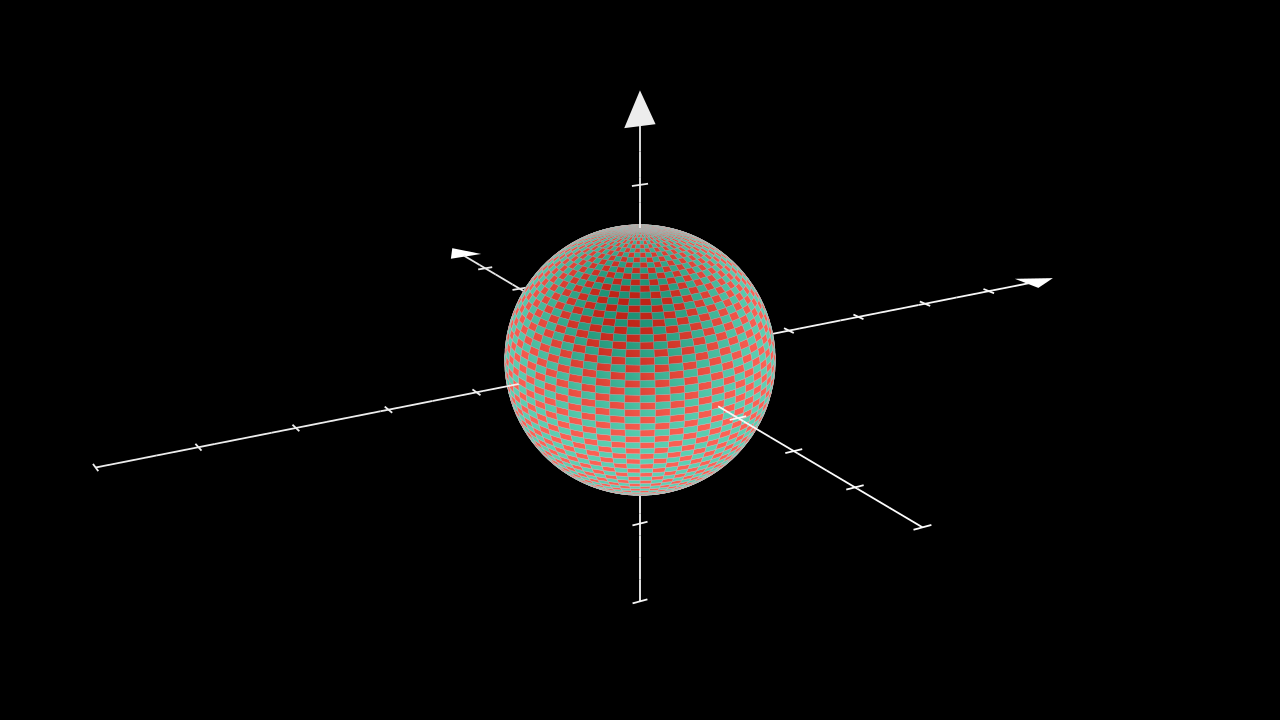

In [18]:
%%manim -qm -v WARNING E12

class E12(ThreeDScene):
    def construct(self):
        axes_3d = ThreeDAxes(
            x_range=(-6,6,1),
            x_length=12,
            y_range=(-5,5,1),
            y_length=10,
            z_range=(-3,3,1),
            z_length=6,
        )
        self.set_camera_orientation(phi=70*DEGREES,theta=-120*DEGREES)
        sphere = Surface(
            lambda u, v: np.array([
                1.5*np.cos(u)*np.cos(v),
                1.5*np.cos(u)*np.sin(v),
                1.5*np.sin(u)
            ]),
            u_range=(-PI/2,PI/2),
            v_range=(0,TAU),
            resolution=60,
            checkerboard_colors=[RED,TEAL]
        )

        self.add(
            axes_3d,sphere
        )

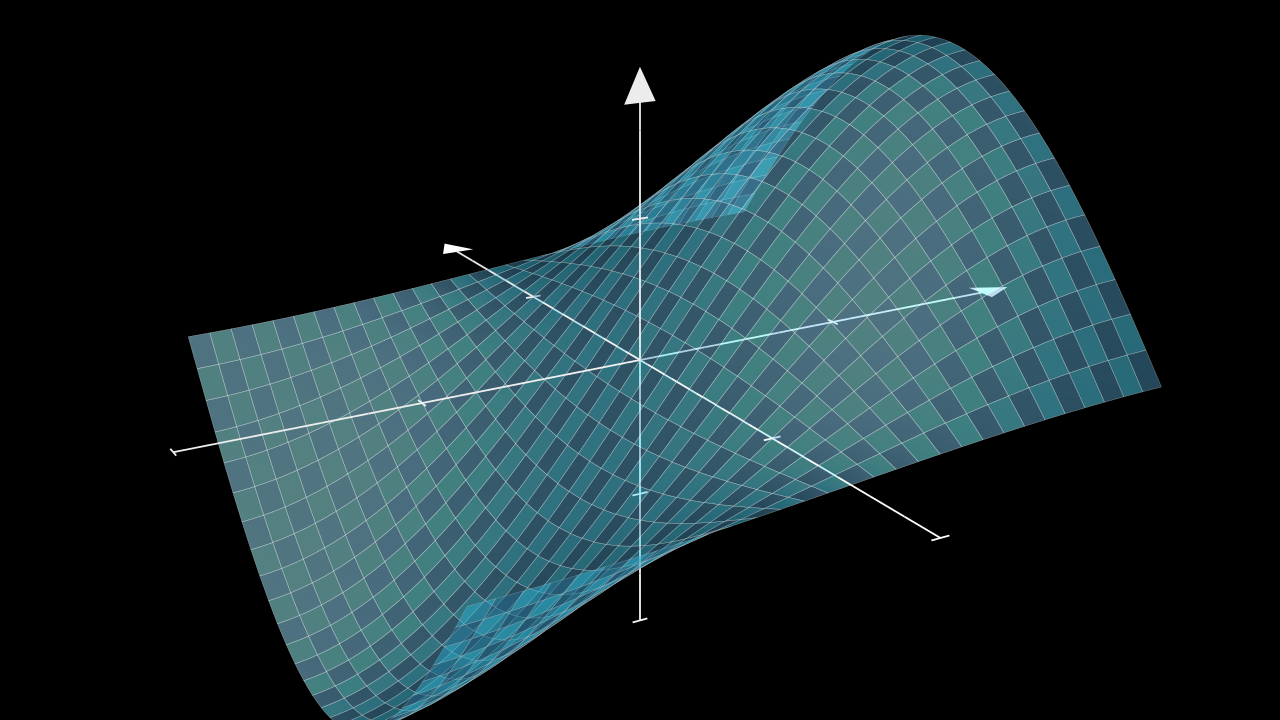

In [19]:
%%manim -qm -v WARNING E13

class E13(ThreeDScene):
    def construct(self):
        self.set_camera_orientation(phi=70*DEGREES,theta=-120*DEGREES)

        axes = ThreeDAxes(x_range=(-2, 2, 1), y_range=(-2, 2, 1), z_range=(-2, 2, 1))

        surface = Surface(
            lambda u, v: axes.c2p(u, v, 2 * np.sin(u) * np.cos(v)),
            resolution=30,
            v_range=[-1.5, 1.5],
            u_range=[-1.5, 1.5],
        )
        surface.fade(0.5)

        self.add(axes,surface)

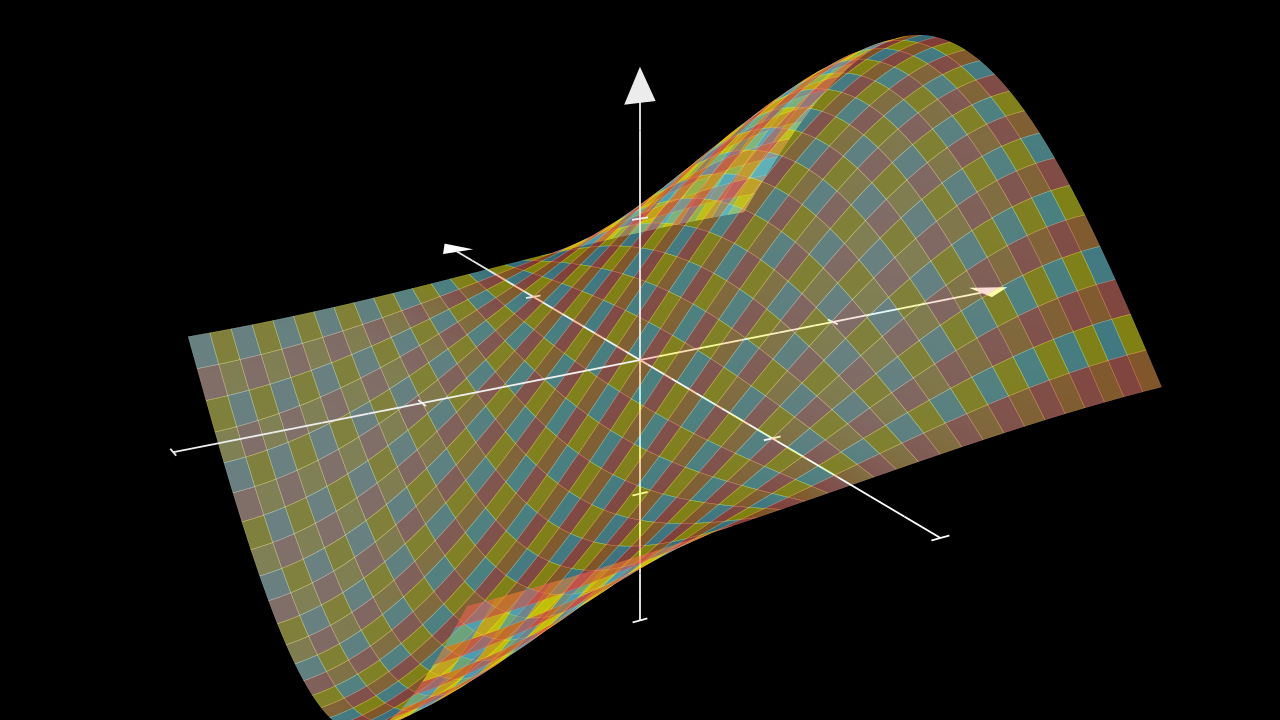

In [20]:
%%manim -qm -v WARNING E14

class E14(ThreeDScene):
    def construct(self):
        self.set_camera_orientation(phi=70*DEGREES,theta=-120*DEGREES)

        axes = ThreeDAxes(x_range=(-2, 2, 1), y_range=(-2, 2, 1), z_range=(-2, 2, 1))

        surface = Surface(
            lambda u, v: axes.c2p(u, v, 2 * np.sin(u) * np.cos(v)),
            resolution=30,
            v_range=[-1.5, 1.5],
            u_range=[-1.5, 1.5],
        )
        surface.fade(0.5)
        from itertools import cycle
        colors = cycle([RED,BLUE,ORANGE,YELLOW])
        for s in surface: s.set_color(next(colors))

        self.add(axes,surface)

In [21]:
%%manim -qm -v WARNING E15

class E15(ThreeDScene):
    def construct(self):
        self.set_camera_orientation(phi=70*DEGREES,theta=-120*DEGREES)
        surface = Sphere(resolution=(15,32),radius=2)
        pieces = surface.copy()
        import random
        random.shuffle(pieces.submobjects)
        for piece in pieces:
            piece.save_state()
        pieces.space_out_submobjects(2)
        pieces.fade(1)
        # In the next course we will learn in
        # detail how to use LaggedStart, for
        # now you can use the code to perform
        # this effect.
        self.play(
            LaggedStartMap(Restore, pieces, lag_ratio=0.005, run_time=4)
        )
        self.remove(pieces)
        self.add(surface)
        self.wait()